In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SAMPLE DATA

In [2]:
data= pd.read_csv('crime.csv', header = 0,engine='python')
data.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182080058          2403  Disorderly Conduct   
1      I182080053          3201       Property Lost   
2      I182080052          2647               Other   
3      I182080051           413  Aggravated Assault   
4      I182080050          3122            Aircraft   

              OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0            DISTURBING THE PEACE      E18            495      NaN   
1                 PROPERTY - LOST      D14            795      NaN   
2       THREATS TO DO BODILY HARM       B2            329      NaN   
3  ASSAULT - AGGRAVATED - BATTERY       A1             92      NaN   
4              AIRCRAFT INCIDENTS       A7             36      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-10-03 20:13:00  2018     10   Wednesday    20    Part Two   
1  2018-08-30 20:00:00  2018      8    Thursday    20  Part Three   
2  2018-10-03 19:20:00  2018     10   Wednesday    19    Part Two   
3  2018-10-03 20:00:00  2018     10   Wednesday    20    Part One   
4  2018-10-03 20:49:00  2018     10   Wednesday    20  Part Three   

         STREET        Lat       Long                     Location  
0  ARLINGTON ST  42.262608 -71.121186  (42.26260773, -71.12118637)  
1    ALLSTON ST  42.352111 -71.135311  (42.35211146, -71.13531147)  
2      DEVON ST  42.308126 -71.076930  (42.30812619, -71.07692974)  
3  CAMBRIDGE ST  42.359454 -71.059648  (42.35945371, -71.05964817)  
4   PRESCOTT ST  42.375258 -71.024663  (42.37525782, -71.02466343)

# STATISTICAL DESCRIPTIONS

In [3]:
data.describe()


OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  327820.000000  327820.000000  327820.000000  327820.000000   
mean     2317.961171    2016.598676       6.672213      13.114840   
std      1184.990073       1.009775       3.253984       6.292714   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  307188.000000  307188.000000  
mean       42.212995     -70.906030  
std         2.173496       3.515832  
min        -1.000000     -71.178674  
25%        42.297466     -71.097081  
50%        42.325552     -71.077493  
75%        42.348624     -71.062482  
max        42.395042      -1.000000

In [4]:
data.kurt()

OFFENSE_CODE     -1.415226
YEAR             -1.090411
MONTH            -1.035742
HOUR             -0.600736
Lat             391.211516
Long            391.324226
dtype: float64

In [5]:
data.skew()


OFFENSE_CODE    -0.410645
YEAR            -0.083805
MONTH           -0.119591
HOUR            -0.482938
Lat            -19.827352
Long            19.831624
dtype: float64

In [6]:
data.var()

OFFENSE_CODE    1.404201e+06
YEAR            1.019645e+00
MONTH           1.058841e+01
HOUR            3.959825e+01
Lat             4.724085e+00
Long            1.236107e+01
dtype: float64

# BOXPLOT (VISUALISASI DATA)

{'whiskers': [<matplotlib.lines.Line2D at 0x185526d8>,
 'caps': [<matplotlib.lines.Line2D at 0x185528d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18552d68>],
 'medians': [<matplotlib.lines.Line2D at 0x18555828>],
 'fliers': [<matplotlib.lines.Line2D at 0x185552b0>],
 'means': []}

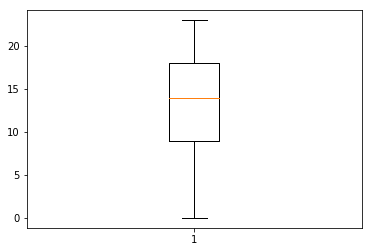

In [7]:
plt.boxplot(data["HOUR"])

{'whiskers': [<matplotlib.lines.Line2D at 0x185760f0>,
 'caps': [<matplotlib.lines.Line2D at 0x18576c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x185767b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1857a2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1857a668>],
 'means': []}

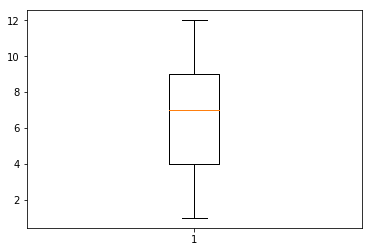

In [8]:
plt.boxplot(data["MONTH"])

{'whiskers': [<matplotlib.lines.Line2D at 0x18597a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1859c748>,
 'boxes': [<matplotlib.lines.Line2D at 0x185970b8>],
 'medians': [<matplotlib.lines.Line2D at 0x1859c710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1859c940>],
 'means': []}

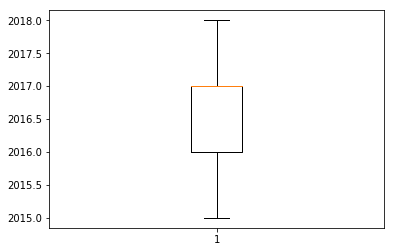

In [9]:
plt.boxplot(data["YEAR"])

# HISTOGRAM (VISUALISASI DATA)

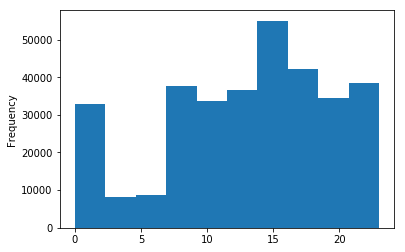

In [10]:
data["HOUR"].plot(kind="hist")

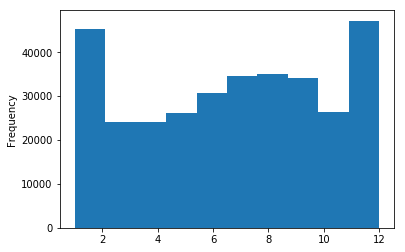

In [11]:
data["MONTH"].plot(kind="hist")

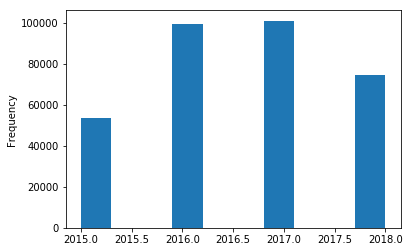

In [12]:
data["YEAR"].plot(kind="hist")

# JAWABAN PERTANYAAN
KARENA data pada dataset semuanya saling bebas secara statistik (saling tidak memengaruhi), maka distribusi yang digunakan oleh dataset ini adalah distribusi binomial. 

a.i

In [13]:
data1 = data[data["OFFENSE_CODE_GROUP"] == "Homicide"]
print("Ekspektasi kejahatan Homicide : ", (1000*data1["OFFENSE_CODE_GROUP"].count())/data["INCIDENT_NUMBER"].count())

Ekspektasi kejahatan Homicide :  0.5033249954243182


a.ii

In [14]:
data2 = data[data["SHOOTING"].isnull()]
data2 = data2[data2["OFFENSE_CODE_GROUP"] == 'Homicide']
print("Ekspektasi Kejahatan HOmicide tanpa shooting : ", (data2["OFFENSE_CODE_GROUP"].count()/data["INCIDENT_NUMBER"].count())*1000)


Ekspektasi Kejahatan HOmicide tanpa shooting :  0.1281190897443719


a.iii

In [15]:
data3 = data[(data["HOUR"] == 20) & (data["DAY_OF_WEEK"] == "Saturday")]
print("Ekspektasi kejahatan pada jam 20.00 dan hari Sabtu : ",
      (data3["INCIDENT_NUMBER"].count()/data["INCIDENT_NUMBER"].count())*1000)

Ekspektasi kejahatan pada jam 20.00 dan hari Sabtu :  6.683545848331401


b.i

In [16]:
data4 = data[(data["STREET"] == "GENEVA AVE") | (data["STREET"] == "PRESCOTT ST")]
print("Ekspektasi kejahatan di Geneva Ave atau Prescott St : ",
      (data4["INCIDENT_NUMBER"].count()/data["INCIDENT_NUMBER"].count())*2000)

Ekspektasi kejahatan di Geneva Ave atau Prescott St :  11.219571716185712


b.ii

In [17]:
data5 = data[(data["REPORTING_AREA"] == "495") & (data["DISTRICT"] == "E18")]
print("Ekspektasi kejahatan yang dilaporkan di Area 495 dan District E18 : ",
      (data5["INCIDENT_NUMBER"].count()/data["INCIDENT_NUMBER"].count())*2000)

Ekspektasi kejahatan yang dilaporkan di Area 495 dan District E18 :  3.019949972545909


b.iii

In [18]:
data6 = data[(~(data["DAY_OF_WEEK"] == "Sunday")) & ~(data["DAY_OF_WEEK"] == "Saturday")]
print("Ekspektasi Kejahatan yang Tidak Terjadi saat hari libur : ",
      (data6["INCIDENT_NUMBER"].count()/data["INCIDENT_NUMBER"].count())*2000)

Ekspektasi Kejahatan yang Tidak Terjadi saat hari libur :  1467.1283021170154
